# **Import the Dataset**

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import plot_tree

In [ ]:
df = pd.read_csv('/content/tested.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(df.size, df.shape)

5016 (418, 12)


# **Data Visualization**

<Axes: xlabel='Fare', ylabel='Count'>

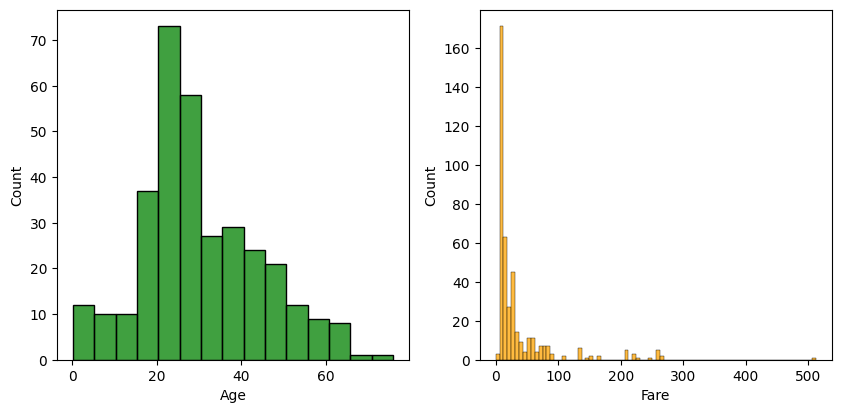

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
sns.histplot(df['Age'], color='green')

plt.subplot(2,2,2)
sns.histplot(df['Fare'], color='orange')

<Axes: >

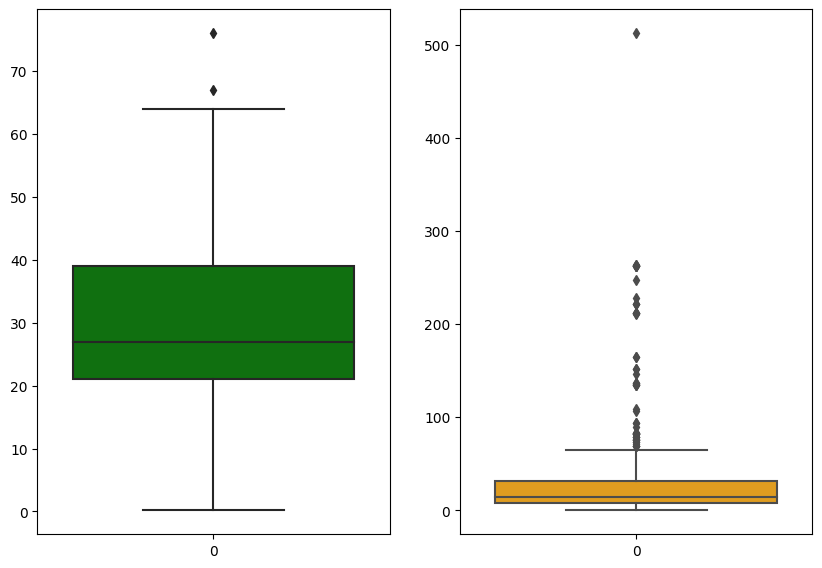

In [ ]:
plt.figure(figsize=(10, 15))

plt.subplot(2,2,1)
sns.boxplot(df['Age'], color='green')

plt.subplot(2,2,2)
sns.boxplot(df['Fare'], color='orange')

<function matplotlib.pyplot.show(close=None, block=None)>

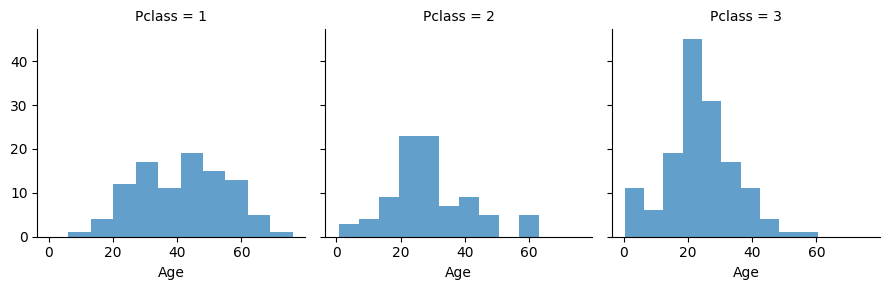

In [ ]:
g = sns.FacetGrid(df, col='Pclass')
g.map(plt.hist, 'Age', alpha=0.7)

plt.show

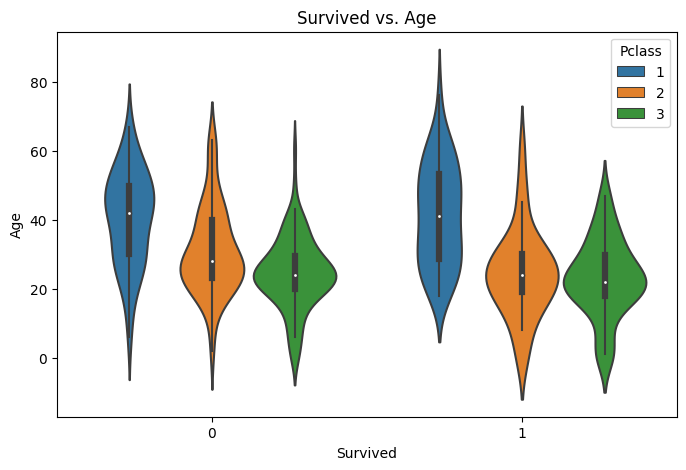

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="Survived", y="Age", hue="Pclass")
plt.title("Survived vs. Age")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

<ipython-input-9-779e752f3447>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

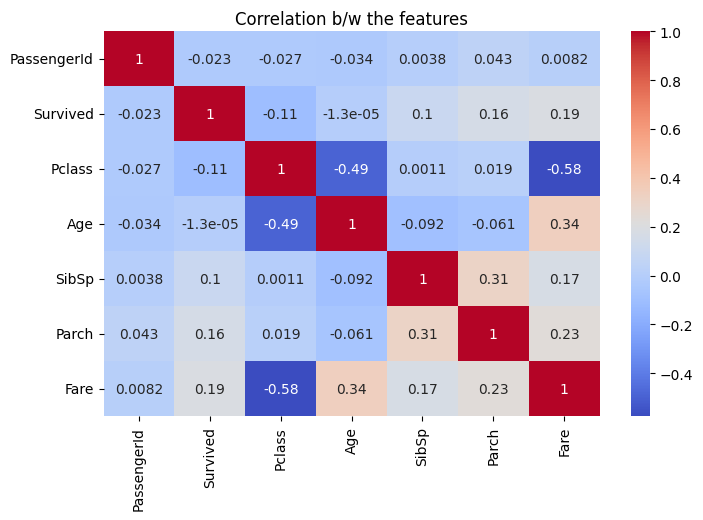

In [ ]:
corr = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation b/w the features")
plt.show

# **Data Preprocessing**

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
titanic = df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [ ]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

In [ ]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
label_encoder = LabelEncoder()
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


# **Model Implementation**

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic[features]
y = titanic['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((334, 7), (84, 7), (334,), (84,))

**Logistic Regression**

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = model_lr.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



**Random Forest Classifier**

In [ ]:
model = RandomForestClassifier(random_state=42, criterion="entropy")
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

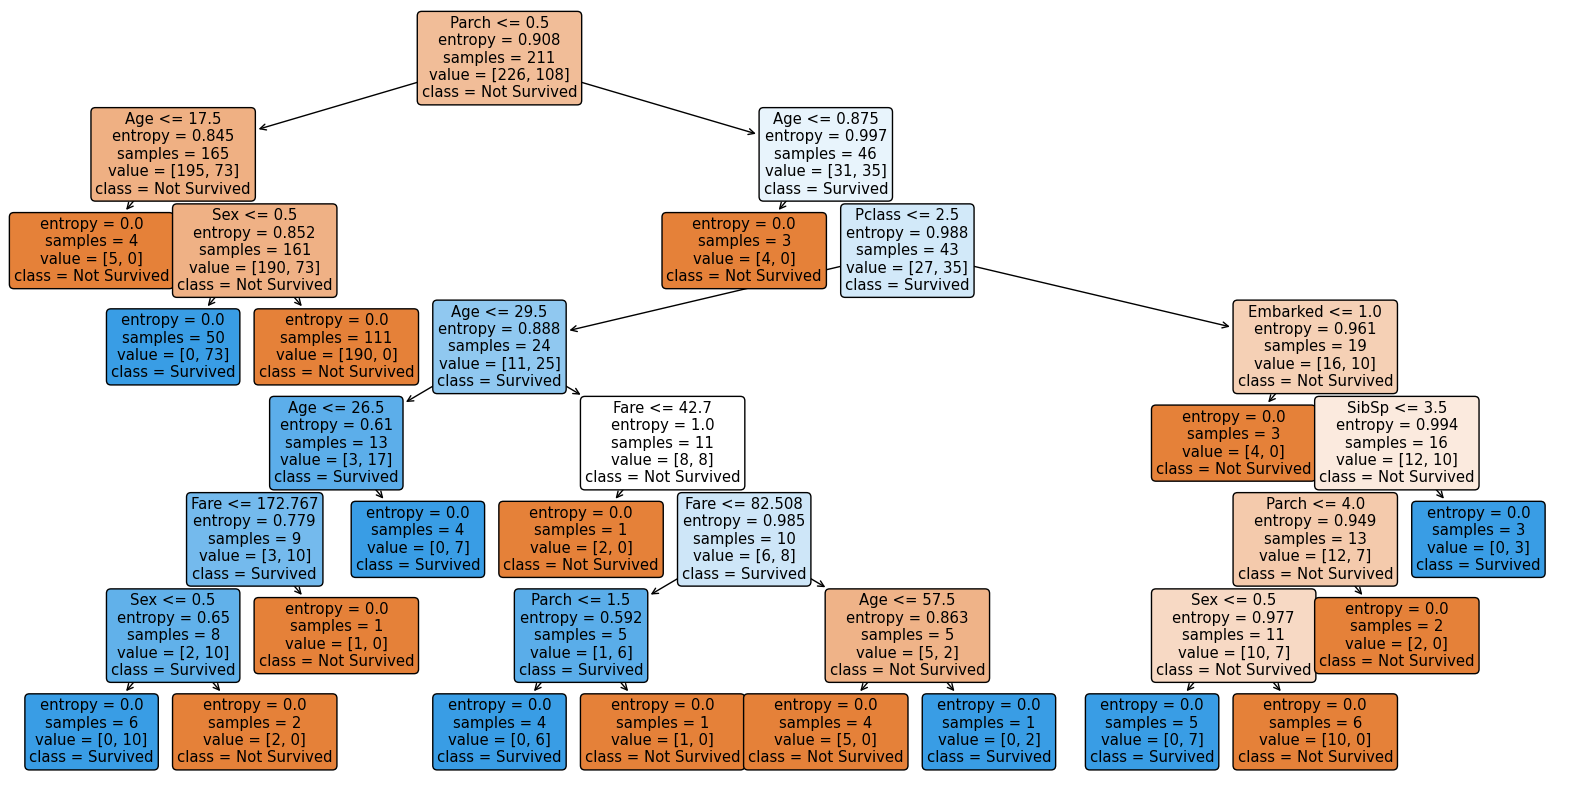

In [ ]:
tree_index = 0  # You can change this index to visualize different trees
estimator = model.estimators_[tree_index]

plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=features, class_names=["Not Survived", "Survived"], filled=True, rounded=True)
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classification_Report: \n",classification_report(y_test,y_pred))

Accuracy: 1.0
Confusion Matrix: 
 [[50  0]
 [ 0 34]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

